In [46]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [80]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [16]:
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("total.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7159,7160,7161,7162,7163,7164,7165,7166,7167,7168
0,3689,3701,3835,2734,4188,3781,3699,3702,3818,4218,...,4326,4305,4310,4289,4224,4271,4316,4309,4255,1
1,4181,4159,4178,4200,4226,4178,4154,4186,4157,4222,...,4202,4193,4194,4201,4223,4235,4238,4320,4252,0
2,4243,4218,4231,4216,4220,4203,4194,4201,4210,4225,...,4311,4309,4297,4308,4224,4296,4268,4334,4209,0
3,4278,4308,4274,4251,4223,4297,4298,4290,4303,4226,...,4136,4139,4147,4129,4224,4135,4176,4140,4170,1
4,4169,4131,4172,4183,4222,4144,4147,4148,4130,4213,...,4187,4206,4188,4189,4225,4176,4196,4268,4097,1


In [3]:
arr_total = np.array(df)

In [4]:
arr_total

array([[3689, 3701, 3835, ..., 4309, 4255,    1],
       [4181, 4159, 4178, ..., 4320, 4252,    0],
       [4243, 4218, 4231, ..., 4334, 4209,    0],
       ...,
       [4244, 4218, 4277, ..., 4182, 4214,    0],
       [4211, 4198, 4207, ..., 4113, 4240,    0],
       [4165, 4117, 4191, ..., 4017, 4245,    0]], dtype=int64)

In [12]:
X = arr_total[:,:-1]

In [14]:
Y = arr_total[:,-1]

In [15]:
Y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
X_n = []
for row in X:
    #save = (row - row.min()) / (row.max() - row.min())
    save = (row - row.mean()) / row.std()
    X_n.append(save)

In [94]:
X_n = np.array(X_n)

In [95]:
def create_model():
    model = Sequential([])
    
    model.add(Dense(512, activation="relu"))
    
    model.add(Dropout(0.2))
    model.add(Dense(256, activation="relu"))
    
    model.add(Dropout(0.2))
    model.add(Dense(64, activation="relu"))
    
    model.add(Dense(1, activation="sigmoid"))
    
    return model

In [96]:
my_model = create_model()

In [97]:
my_model.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics="acc")

In [98]:
history = my_model.fit(X_n, Y, epochs=25, validation_split=0.2, verbose=2)

Epoch 1/25

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

27/27 - 1s - loss: 10.4855 - acc: 0.4689 - val_loss: 1.0622 - val_acc: 0.6268
Epoch 2/25
27/27 - 0s - loss: 4.3450 - acc: 0.4988 - val_loss: 1.1886 - val_acc: 0.6268
Epoch 3/25
27/27 - 0s - loss: 2.3774 - acc: 0.4976 - val_loss: 0.6624 - val_acc: 0.6316
Epoch 4/25
27/27 - 0s - loss: 1.1786 - acc: 0.5371 - val_loss: 0.8685 - val_acc: 0.3732
Epoch 5/25
27/27 - 0s - loss: 1.2842 - acc: 0.4713 - val_loss: 0.6608 - val_acc: 0.6268
Epoch 6/25
27/27 - 0s - loss: 0.9476 - acc: 0.5287 - val_loss: 0.70

In [99]:
train_acc = history.history["acc"]
test_acc = history.history["val_acc"]

In [100]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

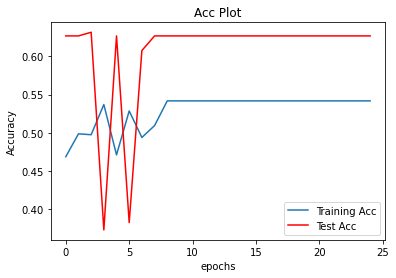

In [101]:
plt.plot(range(25), train_acc)
plt.plot(range(25), test_acc, color="red")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Acc Plot")
plt.legend(['Training Acc', 'Test Acc'])
plt.show()

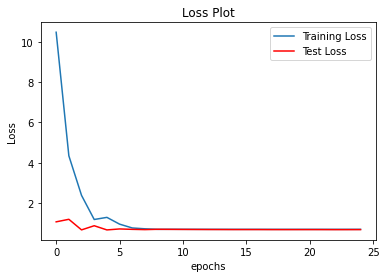

In [102]:
plt.plot(range(25), train_loss)
plt.plot(range(25), test_loss, color="red")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.legend(['Training Loss', 'Test Loss'])
plt.show()